In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
# # Reshape for CNN input
# x_train = x_train.reshape((-1, 28, 28, 1))
# x_test = x_test.reshape((-1, 28, 28, 1))

# # One-hot encode labels
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)


In [17]:
# Stronger model
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [18]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 82s 95ms/step - loss: 0.1654 - accuracy: 0.9505 - val_loss: 0.0509 - val_accuracy: 0.9850
Epoch 2/15
844/844 [==============================] - 88s 104ms/step - loss: 0.0680 - accuracy: 0.9794 - val_loss: 0.0574 - val_accuracy: 0.9825
Epoch 3/15
844/844 [==============================] - 75s 89ms/step - loss: 0.0513 - accuracy: 0.9842 - val_loss: 0.0423 - val_accuracy: 0.9892
Epoch 4/15
844/844 [==============================] - 74s 88ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0355 - val_accuracy: 0.9905
Epoch 5/15
844/844 [==============================] - 75s 88ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 6/15
844/844 [==============================] - 75s 89ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0398 - val_accuracy: 0.9897
Epoch 7/15
844/844 [==============================] - 74s 88ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0383 - val_accuracy

In [19]:
# Save model
os.makedirs("model", exist_ok=True)
model.save("model/digit_classifier1.h5")

c:\Users\emada\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


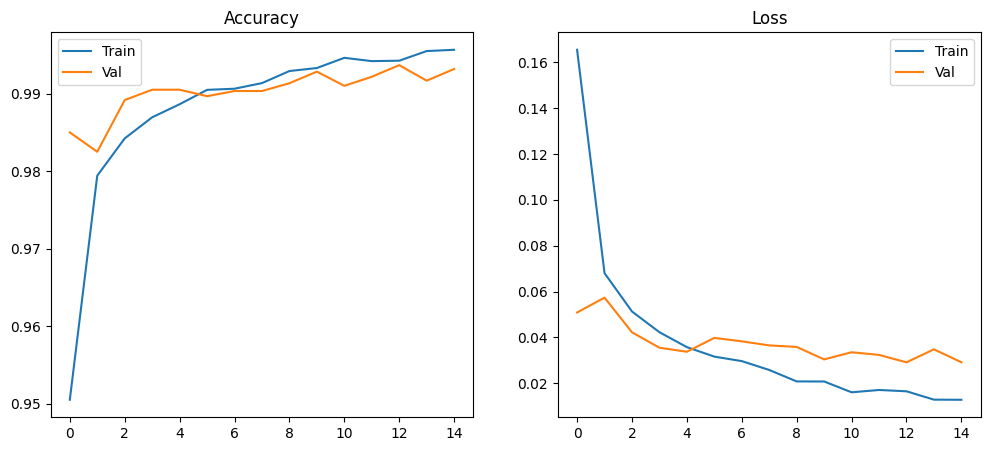

In [20]:
# Accuracy & Loss plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()

os.makedirs("plots", exist_ok=True)
plt.savefig("plots/accuracy_loss.png")

313/313 [==============================] - 4s 13ms/step


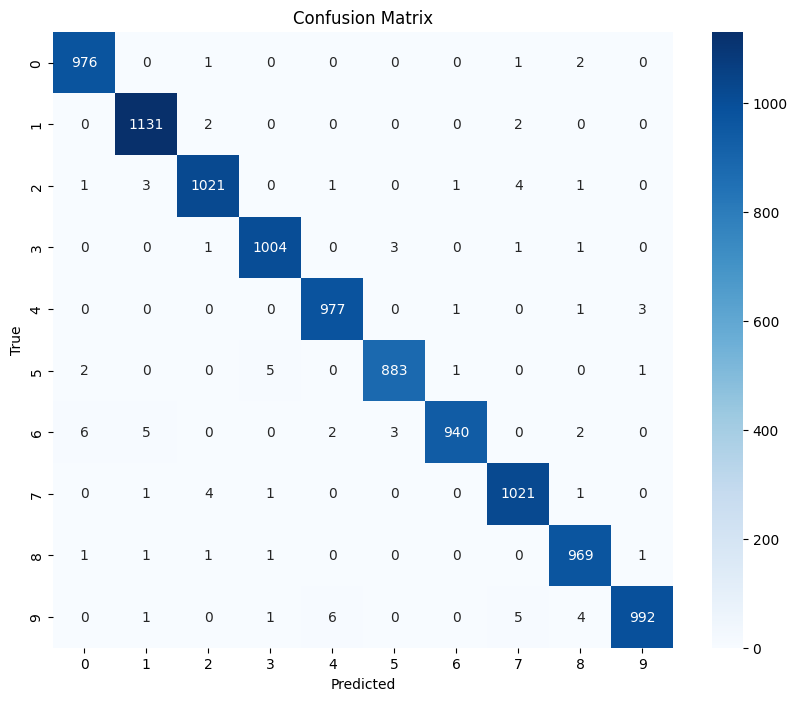

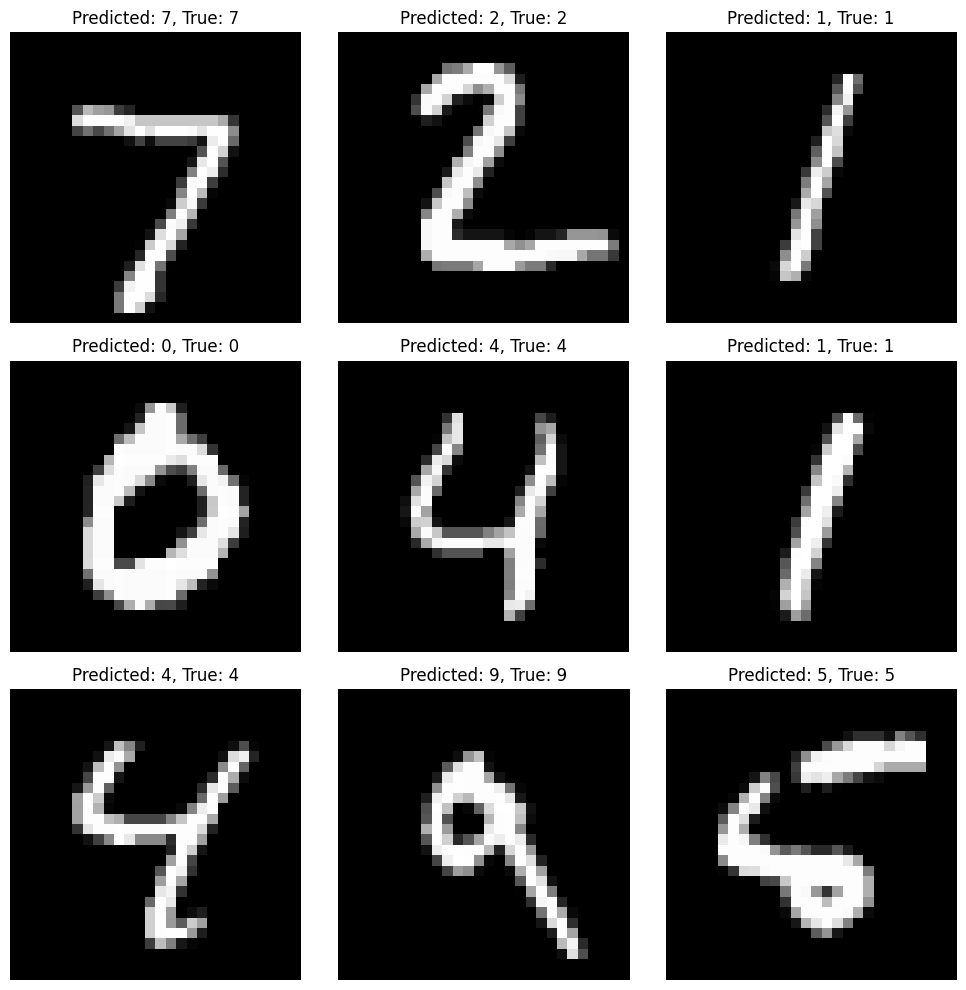

In [21]:
# Evaluation
y_pred = model.predict(x_test).argmax(axis=1)

confusion_mtx = tf.math.confusion_matrix(y_test, y_pred, num_classes=10)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("plots/confusion_matrix.png")
plt.show()

# Display some predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Predicted: {y_pred[i]}, True: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.savefig("plots/sample_predictions.png")
plt.show()



In [ ]:
# # Evaluation
# y_pred = model.predict(x_test).argmax(axis=1)

# conf_mat = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
# plt.title("Confusion Matrix")
# plt.savefig("plots/confusion_matrix.png")

# report = classification_report(y_test, y_pred)
# with open("plots/classification_report.txt", "w") as f:
#     f.write(report)

# print("Model training & evaluation complete ✅")

In [ ]:
# # Save the model
# model_dir = "saved_model"
# os.makedirs(model_dir, exist_ok=True)
# model.save(os.path.join(model_dir, "digit_classifier.h5"))

c:\Users\emada\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


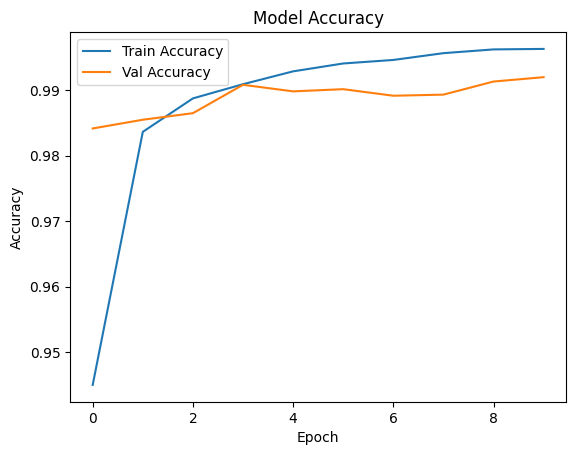

In [8]:
# Optional: Plot training history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

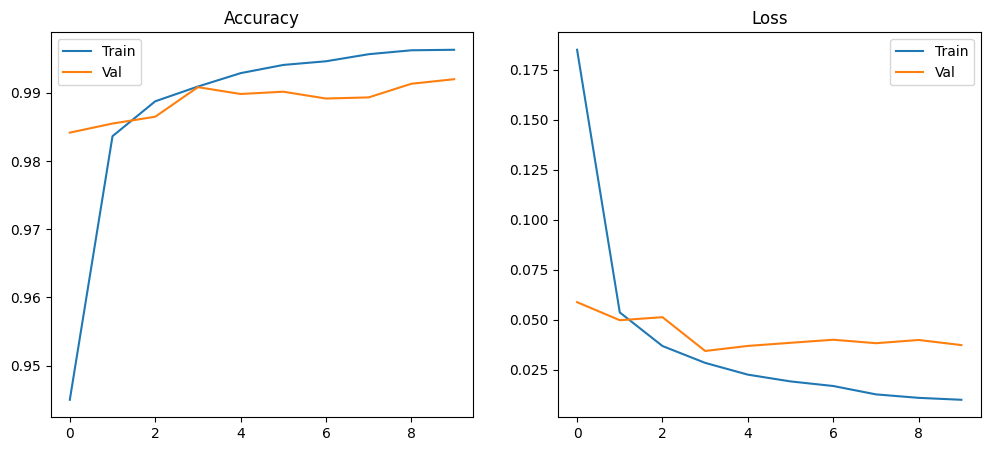

In [9]:
# Plot accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()

os.makedirs("plots", exist_ok=True)
plt.savefig("plots/accuracy_loss.png")
